# Import libraries

In [1]:
# for inline plots in jupyter
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd
from scipy.stats import norm, uniform, expon, gamma, bernoulli, binom, geom, nbinom, poisson, hypergeom
import math
from scipy import stats
import random

# Import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Import bivariate distribution
from scipy.stats import multivariate_normal, dirichlet

# Plot distributions

In [2]:
def plot_distribution_headers(ax, xlabel, ylabel):
    ax.title.set_text(xlabel)
    ax.set(ylabel=ylabel)
def d_rv_stat(rvs, labels):
    df = pd.DataFrame(columns=['Mean', 'Variance'])
    for i, rv in enumerate(rvs):
        df.loc[labels[i]] = [rv.mean(), rv.var()]
    return df

## Continuous distribution

In [69]:
def plot_rv(rvs, labels, a, b, title = '', nbins = 20, tabulate = False, show_mean = True):
    fig, axs = plt.subplots(3, 2, figsize=(19, 12))
    fig.suptitle(title)
    ax1 = axs[0, 0]
    plot_distribution_headers(ax1, 'Histogram', 'Frequency')
    ax2 = axs[0, 1]
    plot_distribution_headers(ax2, 'Cumulative distribution function', 'Frequency')
    SIZE = 10000
    data = pd.DataFrame()
    for i, rv in enumerate(rvs):
        data[labels[i]] = rv.rvs(size=SIZE)
    sns.histplot(data,
                 bins=nbins,
                 kde=True,
                 alpha = 0.3,
                 ax = ax1)
    sns.histplot(data,
                 bins=nbins,
                 kde=True,
                 alpha = 0.3,
                 cumulative = True,
                 ax = ax2)    
    
    x = np.linspace(a, b, 100)
    ax = axs[1, 0]
    plot_distribution_headers(ax, 'Probability density function', 'Value')
    for i, rv in enumerate(rvs):
        y = rv.pdf(x)
        line, = ax.plot(x, y, label = labels[i])
        if tabulate:
            print("PDF " + labels[i] + ": ", end="")
            print(y)
        if show_mean:
            color = line.get_color()
            mean = rv.mean()
            ax.vlines(x=[mean], ymin=[0], ymax=[rv.pdf(mean)], 
                      linestyle='dashed', zorder=1, color = color)
        
    ax.legend()
    
    ax = axs[1, 1]
    ax2 = axs[2, 1]
    colors = []
    plot_distribution_headers(ax, 'Cumulative distribution function', 'Value')
    for i, rv in enumerate(rvs):
        y = rv.cdf(x)
        ax.plot(x, y, label = labels[i])
        #line, = ax2.plot(x, y, label = labels[i])
        #colors.append(line.get_color())
        if tabulate:
            print("CDF " + labels[i] + ": ", end="")
            print(y)
    ax.legend()
    
    ax = axs[2, 1]
    x = np.linspace(0, 1, 100)
    #ax.plot(x, x)
    plot_distribution_headers(ax, 'Percent point function', 'Value') # Inverse CDF, quantitive function
    for i, rv in enumerate(rvs):
        y = rv.ppf(x)
        #ax.plot(x, y, color = colors[i])
        ax.plot(x, y)
        if tabulate:
            print("PPF " + labels[i] + ": ", end="")
            print(y)
    
        
    ax.legend()

In [65]:
def plot_rv(rvs, labels, a, b, title = '', nbins = 20, tabulate = False, show_mean = True, colors=['red', 'green', 'blue']):
    plot_rows=3
    plot_cols=2
    fig = make_subplots(rows=plot_rows, cols=plot_cols, 
                        subplot_titles=("Histogram", "Cumulative Distribution Function", 
                                        "Probability Density Function", "Cumulative Distribution Function", 
                                        "", "Percent point function"))
    SIZE = 1000
    for idx, rv in enumerate(rvs):
        data = rv.rvs(size=SIZE)
        hist, bin_edges = np.histogram(data, density=True)
        cdf = np.cumsum(hist*np.diff(bin_edges))
        fig.add_trace(go.Histogram(x = data,
                                   histnorm='probability density', marker_color = colors[idx],
                                   legendgroup=labels[idx],
                                   name = labels[idx]
                                  ), row=1, col=1)
        fig.add_trace(go.Scatter(x = (bin_edges[1:] + bin_edges[:-1])/2, y = hist,
                                 line_shape='spline', marker_color = colors[idx],
                                 legendgroup=labels[idx],
                                 name = labels[idx],
                                 showlegend=False
                                  ), row=1, col=1)


        fig.add_trace(go.Histogram(x = data,
                                   histnorm='probability density', marker_color = colors[idx],
                                   cumulative_enabled=True,
                                   legendgroup=labels[idx],
                                   name = labels[idx],
                                   showlegend=False
                                  ), row=1, col=2)

        fig.add_trace(go.Scatter(x = bin_edges[1:], y = cdf,
                                 line_shape='spline', marker_color = colors[idx],
                                 legendgroup=labels[idx],
                                 name = labels[idx],
                                 showlegend=False
                                  ), row=1, col=2)

    x = np.linspace(a, b, 100)
    for idx, rv in enumerate(rvs):
            y = rv.pdf(x)
            fig.add_trace(go.Scatter(x = x, y = y,
                                 line_shape='spline', marker_color = colors[idx],
                                 legendgroup=labels[idx],
                                 name = labels[idx],
                                 showlegend=False
                                  ), row=2, col=1)
            if tabulate:
                print("PDF " + labels[i] + ": ", end="")
                print(y)
            if show_mean:
                color = colors[idx]
                mean = rv.mean()
                fig.add_trace(go.Scatter(x = [mean, mean], y = [0, rv.pdf(mean)],
                                 line_shape='spline', marker_color = colors[idx],
                                 legendgroup=labels[idx],
                                 name = labels[idx],
                                 showlegend=False
                                  ), row=2, col=1)
            y = rv.cdf(x)
            fig.add_trace(go.Scatter(x = x, y = y,
                                 line_shape='spline', marker_color = colors[idx],
                                 legendgroup=labels[idx],
                                 name = labels[idx],
                                 showlegend=False
                                  ), row=2, col=2)
            fig.add_trace(go.Scatter(x = x, y = y,
                                 line_shape='spline', marker_color = colors[idx],
                                 legendgroup=labels[idx],
                                 name = labels[idx],
                                 showlegend=False
                                  ), row=3, col=2)
            if tabulate:
                print("CDF " + labels[i] + ": ", end="")
                print(y)
                
    x = np.linspace(0, 1, 100)
    for idx, rv in enumerate(rvs):
            y = rv.ppf(x)
            fig.add_trace(go.Scatter(x = x, y = x,
                                 line_shape='spline', marker_color = colors[idx],
                                 legendgroup=labels[idx],
                                 name = labels[idx],
                                 showlegend=False
                                  ), row=3, col=2)
            fig.add_trace(go.Scatter(x = x, y = y,
                                 line_shape='spline', marker_color = colors[idx],
                                 legendgroup=labels[idx],
                                 name = labels[idx],
                                 showlegend=False
                                  ), row=3, col=2)
            if tabulate:
                print("PDF " + labels[i] + ": ", end="")
                print(y)


    fig.update_layout(barmode='overlay', title=title, width=1000, height=800)
    fig.update_traces(opacity=0.3)
    fig.update_xaxes(matches='x')
    fig.update_annotations(font_size=12)
    fig.show()

### Normal Distribution

The probability density function (PDF) is given by,
$$ f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}} $$
where,
- $\mu$ is the mean or expectation of the distribution (and also its median and mode),
- $\sigma$ is the standard deviation, and $\sigma^2$ is the variance.

![normal](https://raw.githubusercontent.com/tirthajyoti/Stats-Maths-with-Python/master/images/normal.PNG)

No handles with labels found to put in legend.


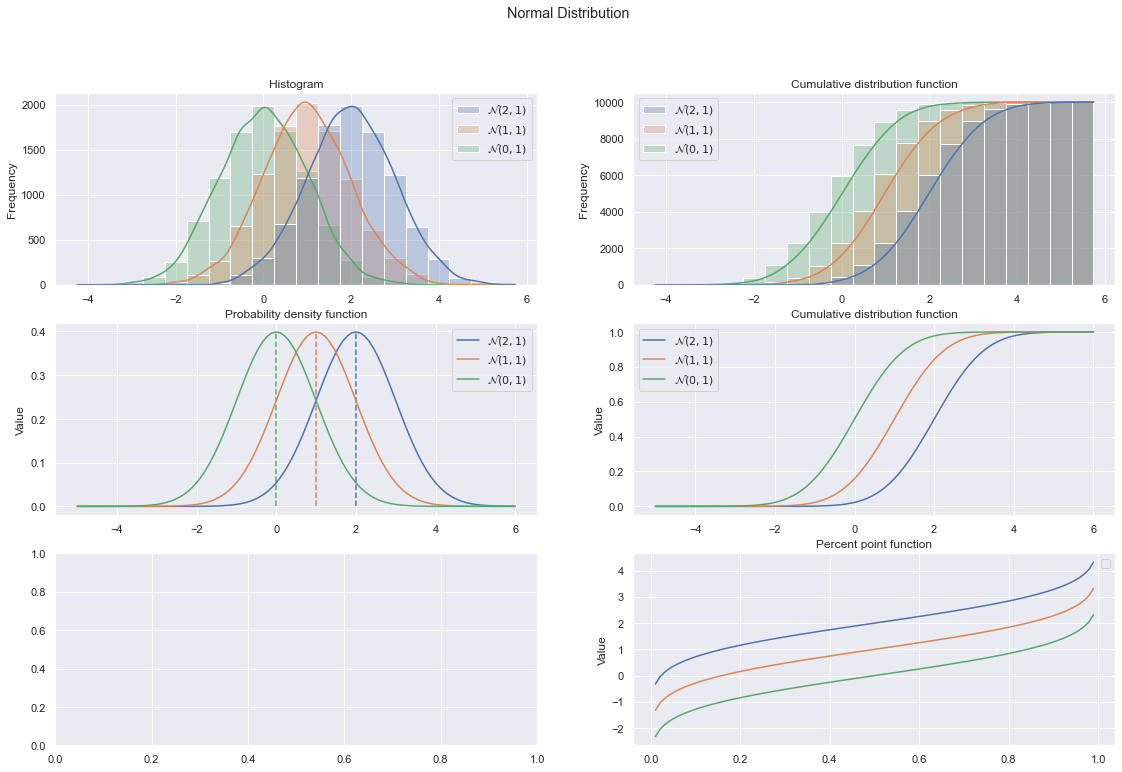

In [70]:
from scipy.stats import norm
locs = [2, 1, 0]
scales = [1, 1, 1]
rvs = [norm(loc=i, scale=j) for i, j in zip(locs, scales)]
labels = ['$\mathcal{N}' + '({0}, {1})'.format(i, j) + '$' for i, j in zip(locs, scales)]

plot_rv(rvs, labels, -5, 6, 'Normal Distribution', tabulate = False)

### Uniform Distribution

- Uniform distribution, $U(a,b)$:
$$ f(x)={\begin{cases}{\frac {1}{b-a}}&\mathrm {for} \ a\leq x\leq b,\\[8pt]0&\mathrm {for} \ x<a\ \mathrm {or} \ x>b\end{cases}} $$
![uniform](https://raw.githubusercontent.com/tirthajyoti/Stats-Maths-with-Python/master/images/uniform_dist.PNG)
- $E(x) = \frac{a+b}{2}$
- $Var(x) = \frac{(b-a)^2}{12}$

No handles with labels found to put in legend.


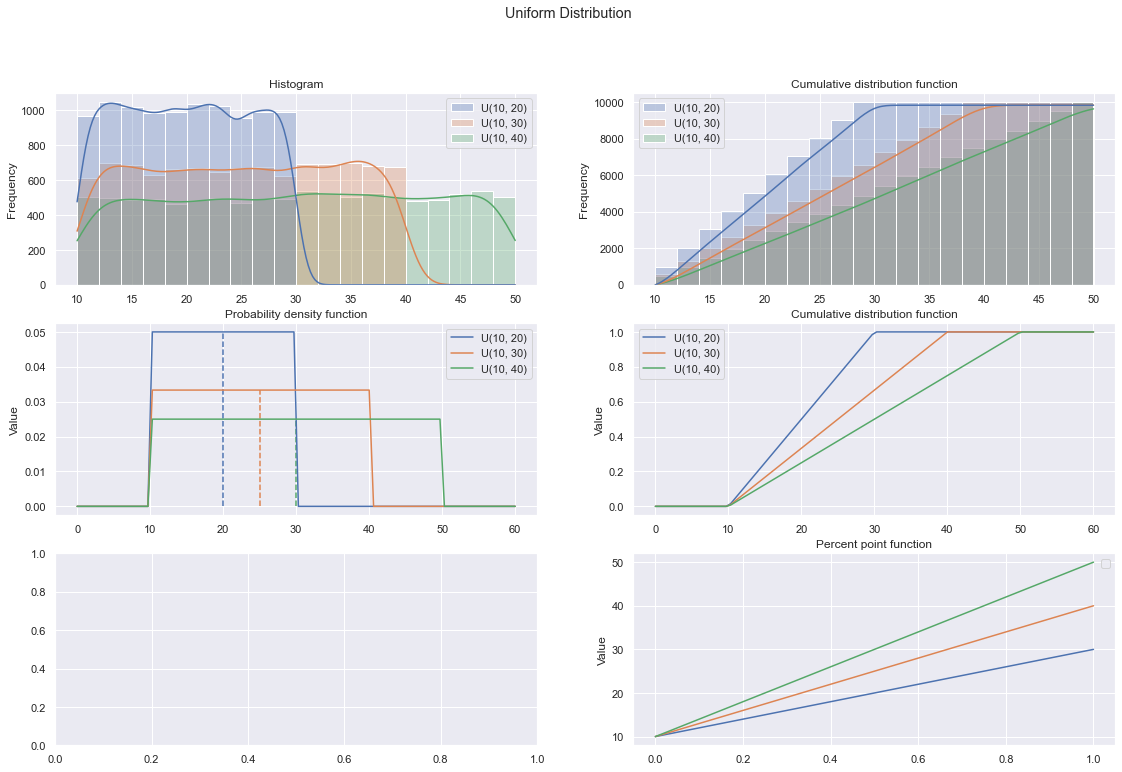

In [71]:
# import uniform distribution
from scipy.stats import uniform
locs = [10, 10, 10]
scales = [20, 30, 40]
rvs = [uniform(loc=i, scale=j) for i, j in zip(locs, scales)]
labels = ['U({0}, {1})'.format(i, j) for i, j in zip(locs, scales)]

plot_rv(rvs, labels, 0, 60, 'Uniform Distribution')

### Exponential Distribution

- Exponential distribution ($Exp( \lambda )$) with $\lambda$ which can be interpreted as the occurrence rate
- Meaning of the exponential distribution: often describes the amount of time before a certain event occurs 
- Probability distribution function:
For $\lambda > 0$.
$$ f(x)={\begin{cases}{\lambda \mathrm{e}^{-\lambda x}}&\mathrm {for} \ x > 0,\\[8pt]0&\mathrm {for} \ x\leq 0 \end{cases}} $$
- Cumulative distribution function:
\begin{equation}
    F(x) = 1 - e^{\lambda x}
\end{equation}
- $E(X) = \frac{1}{\lambda}$
- $Var(X) = \frac{1}{\lambda^2}$

No handles with labels found to put in legend.


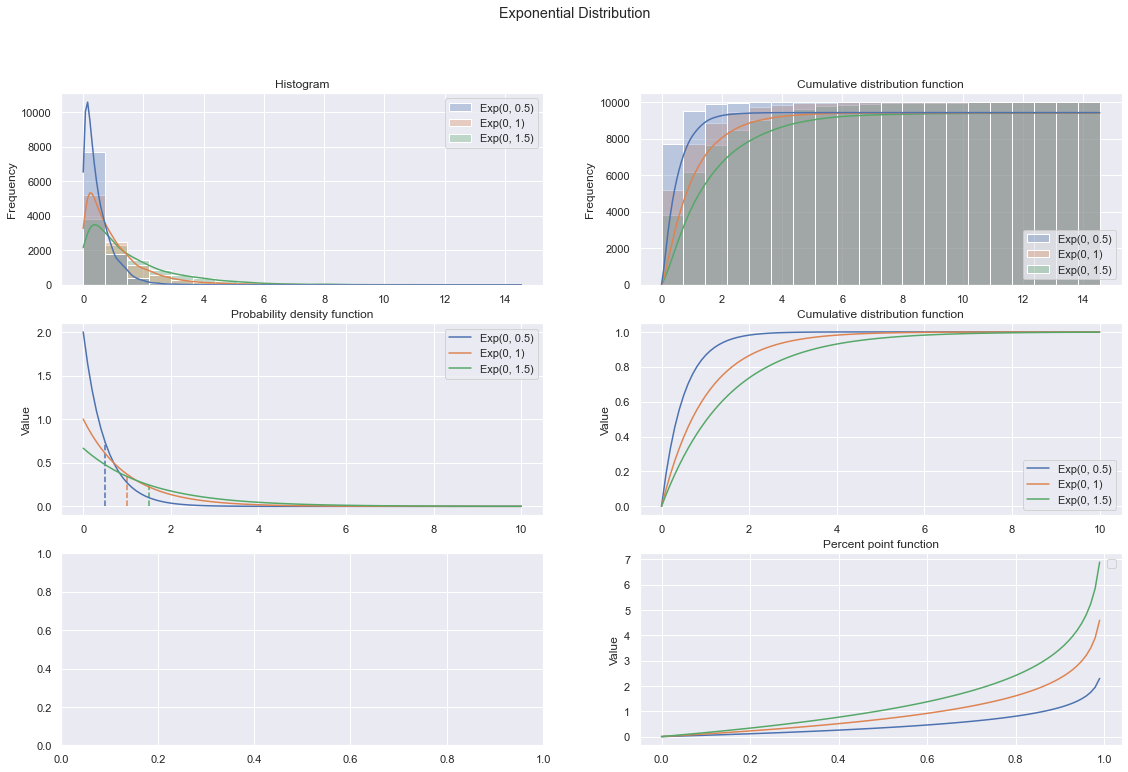

In [72]:
from scipy.stats import expon
locs = [0, 0, 0]
scales = [0.5, 1, 1.5]
rvs = [expon(loc=i, scale=j) for i, j in zip(locs, scales)]
labels = ['Exp({0}, {1})'.format(i, j) for i, j in zip(locs, scales)]

plot_rv(rvs, labels, 0, 10, 'Exponential Distribution')

### Gamma Distribution

- Useful for describing reliability
- Gamma function:
\begin{equation}
    \Gamma(k) = \int_0^{\infty} x^{k-1}e^{-x}dx \text{ for } k>0
\end{equation}
- Gamma distribution $Gamma(k, \lambda)$ with $k>0$ and $\lambda >0$
\begin{equation}
    f(x; k, \lambda) = \frac{\lambda ^k}{\Gamma (k)} x ^ {k-1} e ^ {- \lambda x} \text{ , } x > 0
\end{equation}
- $ E(X) = \frac{k}{ \lambda }$
- $ Var(X) = \frac{k}{ \lambda ^2}$

No handles with labels found to put in legend.


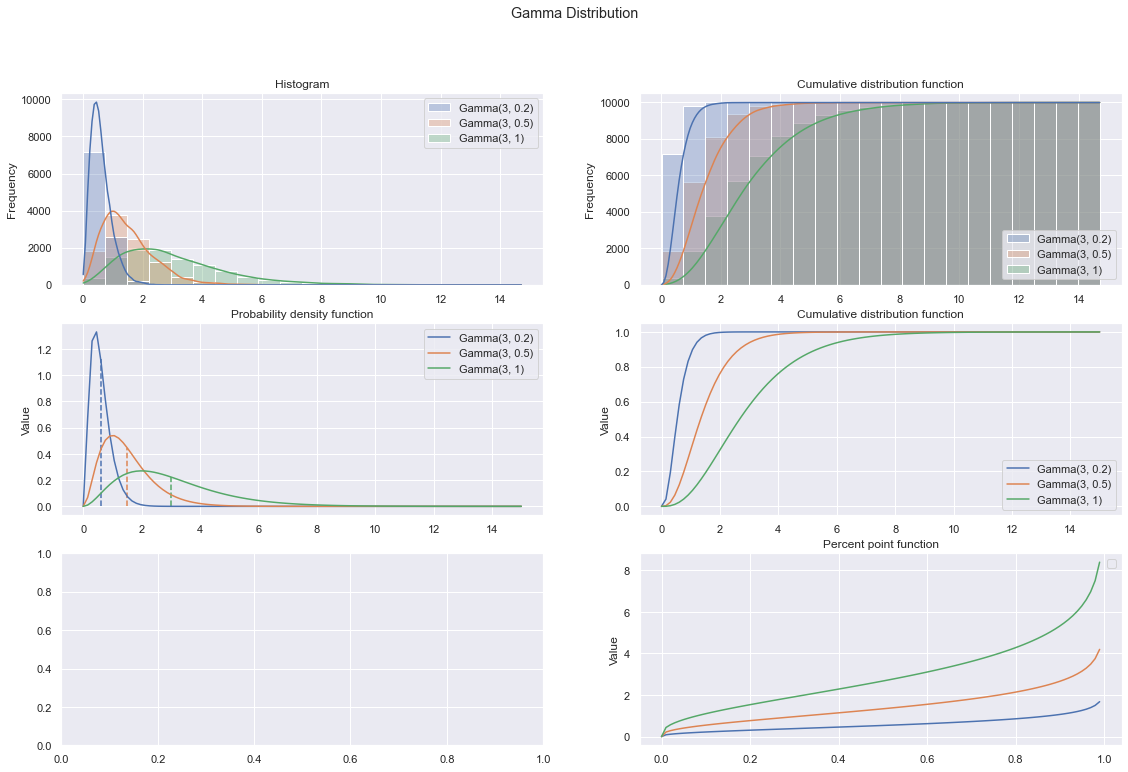

In [73]:
from scipy.stats import gamma
#locs = [0, 0, 0]
a = [3, 3, 3]
scales = [0.2, 0.5, 1] # scale = 1.0 / lambda
rvs = [gamma(a=i, scale=j) for i, j in zip(a, scales)]
labels = ['Gamma({0}, {1})'.format(i, j) for i, j in zip(a, scales)]

plot_rv(rvs, labels, 0, 15, 'Gamma Distribution')

### Beta Distribution

No handles with labels found to put in legend.


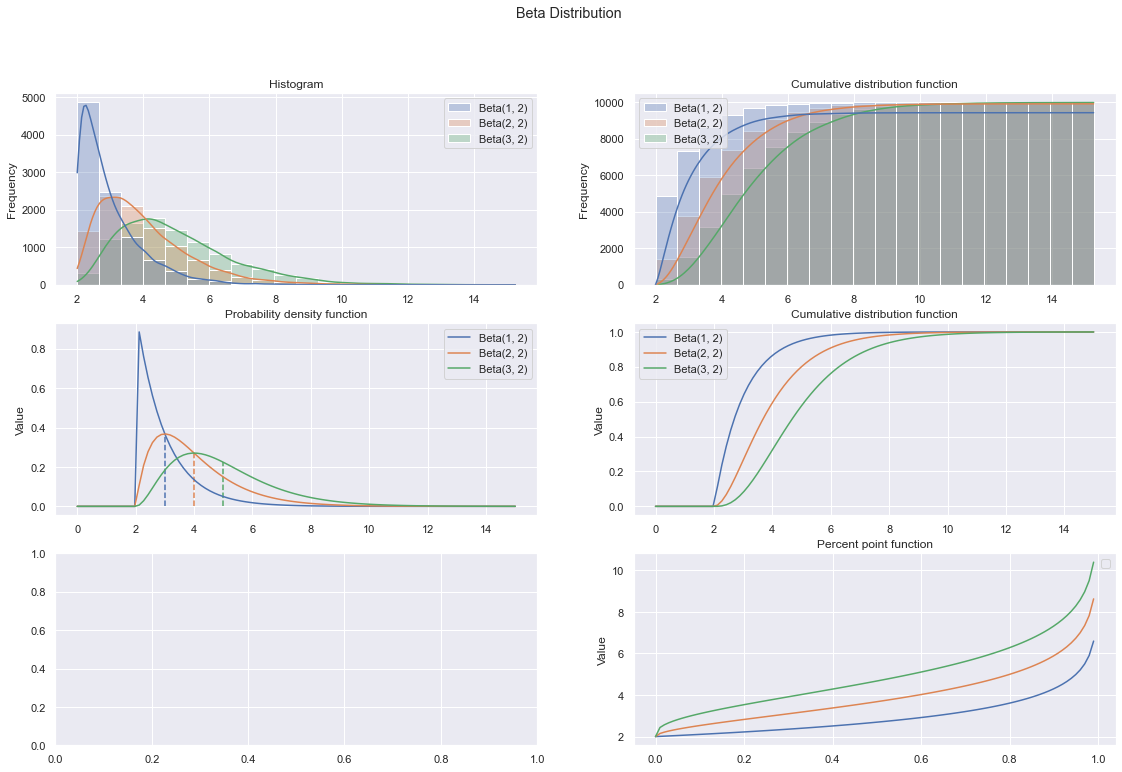

In [74]:
from scipy.stats import beta
a = [1, 2, 3]
b = [2, 2, 2]
rvs = [gamma(i, j) for i, j in zip(a, b)]
labels = ['Beta({0}, {1})'.format(i, j) for i, j in zip(a, b)]

plot_rv(rvs, labels, 0, 15, 'Beta Distribution')

### Additional
#### Logistic Distribution

No handles with labels found to put in legend.


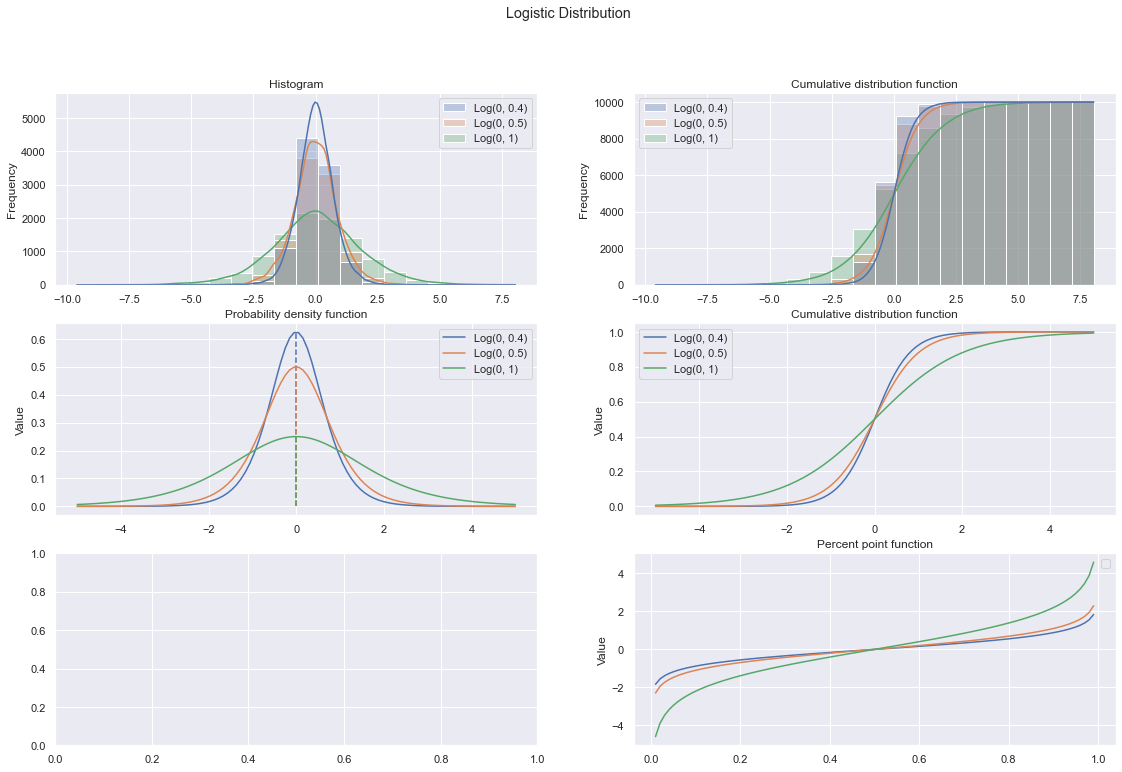

In [75]:
from scipy.stats import logistic
locs = [0, 0, 0]
scales = [0.4, 0.5, 1]
rvs = [logistic(loc=i, scale=j) for i, j in zip(locs, scales)]
labels = ['Log({0}, {1})'.format(i, j) for i, j in zip(locs, scales)]

plot_rv(rvs, labels, -5, 5, 'Logistic Distribution')

#### Laplace Distribution

No handles with labels found to put in legend.


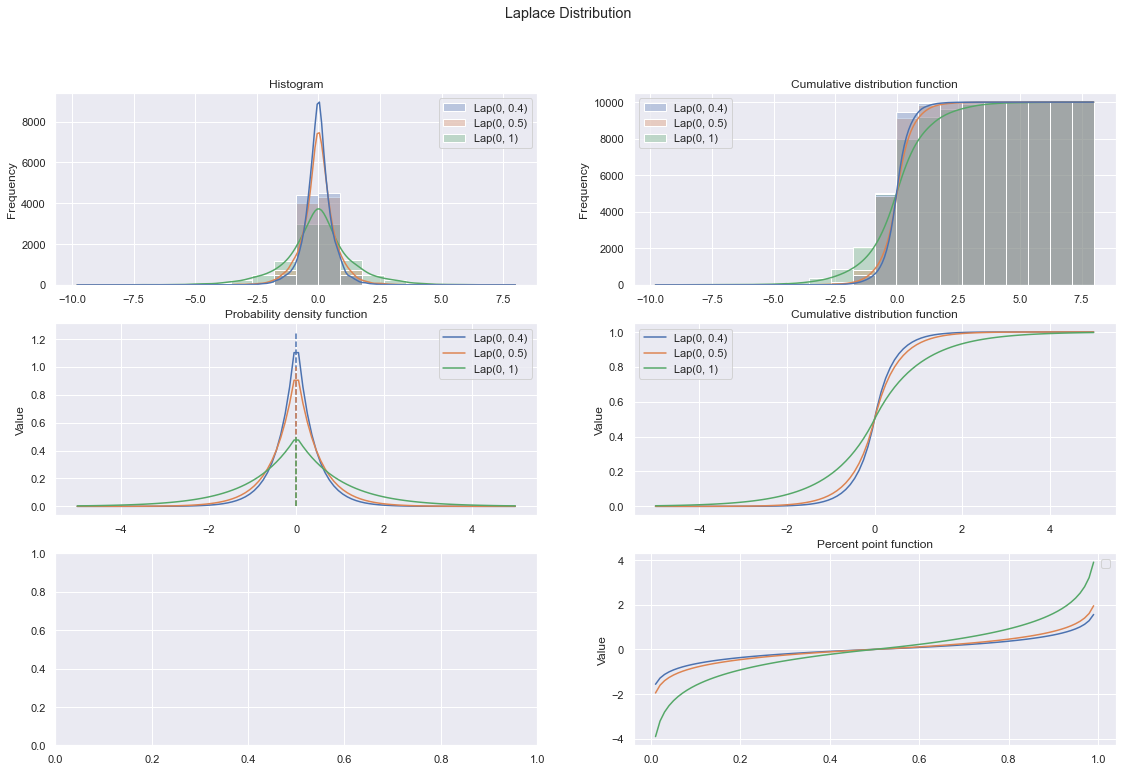

In [76]:
from scipy.stats import laplace
locs = [0, 0, 0]
scales = [0.4, 0.5, 1]
rvs = [laplace(loc=i, scale=j) for i, j in zip(locs, scales)]
labels = ['Lap({0}, {1})'.format(i, j) for i, j in zip(locs, scales)]

plot_rv(rvs, labels, -5, 5, 'Laplace Distribution')

## Chi-square ($\chi^2$) distribution as a sum of squared Normally distributed variables

In probability theory and statistics, the **chi-square distribution (also chi-squared or χ2-distribution) with _k_ degrees of freedom is the distribution of a sum of the squares of _k_ independent standard normal random variables**. 

The chi-square distribution is a special case of the [gamma distribution](https://en.wikipedia.org/wiki/Gamma_distribution) and is one of the most widely used probability distributions in inferential statistics, notably in hypothesis testing or in construction of confidence intervals.

The probability density function (pdf) of the chi-square distribution is

$$ f(x;\,k)={\begin{cases}{\dfrac {x^{{\frac {k}{2}}-1}e^{-{\frac {x}{2}}}}{2^{\frac {k}{2}}\Gamma \left({\frac {k}{2}}\right)}},&x>0;\\0,&{\text{otherwise}}.\end{cases}} $$

where $\Gamma({k/2})$ denotes the gamma function, which has closed-form values for integer $k$. 

## F-distribution as a ratio of two scaled Chi-squared distributions
In probability theory and statistics, the F-distribution, also known as **Snedecor's F distribution** or the **Fisher–Snedecor distribution** (after [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) and [George W. Snedecor](https://en.wikipedia.org/wiki/George_W._Snedecor)) is a continuous probability distribution that arises frequently as the null distribution of a test statistic, most notably in the analysis of variance (ANOVA), e.g., F-test.

Then the probability density function (pdf) for X is given by

$$ {\begin{aligned}f(x;d_{1},d_{2})&={\frac {\sqrt {\frac {(d_{1}\,x)^{d_{1}}\,\,d_{2}^{d_{2}}}{(d_{1}\,x+d_{2})^{d_{1}+d_{2}}}}}{x\,\mathrm {B} \!\left({\frac {d_{1}}{2}},{\frac {d_{2}}{2}}\right)}}\\&={\frac {1}{\mathrm {B} \!\left({\frac {d_{1}}{2}},{\frac {d_{2}}{2}}\right)}}\left({\frac {d_{1}}{d_{2}}}\right)^{\frac {d_{1}}{2}}x^{{\frac {d_{1}}{2}}-1}\left(1+{\frac {d_{1}}{d_{2}}}\,x\right)^{-{\frac {d_{1}+d_{2}}{2}}}\end{aligned}} $$

Here $\mathrm {B}$ is the beta function. In many applications, the parameters $d_1$ and $d_2$ are positive integers, but the distribution is well-defined for positive real values of these parameters.

## Student's t-distribution

In probability and statistics, Student's t-distribution (or simply the t-distribution) is any member of a family of continuous probability distributions that arises when **estimating the mean of a normally distributed population in situations where the sample size is small and population standard deviation is unknown**. It was developed by [William Sealy Gosset](https://en.wikipedia.org/wiki/William_Sealy_Gosset) under the pseudonym Student.

The t-distribution plays a role in a number of widely used statistical analyses, including Student's t-test for assessing the statistical significance of the difference between two sample means, the construction of confidence intervals for the difference between two population means, and in linear regression analysis. The Student's t-distribution also arises in the Bayesian analysis of data from a normal family.

Student's t-distribution has the probability density function given by,
$$ f(t)={\frac {\Gamma ({\frac {\nu +1}{2}})}{{\sqrt {\nu \pi }}\,\Gamma ({\frac {\nu }{2}})}}\left(1+{\frac {t^{2}}{\nu }}\right)^{\!-{\frac {\nu +1}{2}},\!} $$

where $\nu$ is the number of degrees of freedom and $\Gamma$ is the gamma function. 


## Discrete distribution

In [124]:
def plot_d_rv(rvs, labels, a, b, title = '', tabulate = False, show_mean = True):
    fig, axs = plt.subplots(2, 2, figsize=(19, 8))
    fig.suptitle(title)
    ax1 = axs[0, 0]
    plot_distribution_headers(ax1, 'Histogram', 'Frequency')
    ax2 = axs[0, 1]
    plot_distribution_headers(ax2, 'Cumulative distribution function', 'Frequency')
    SIZE = 10000
    data = pd.DataFrame()
    for i, rv in enumerate(rvs):
        data[labels[i]] = rv.rvs(size=SIZE)
    sns.histplot(data,
                 #bins=nbins,
                 kde=False,
                 alpha = 0.3,
                 discrete=True,
                 ax = ax1)
    sns.histplot(data,
                 #bins=nbins,
                 kde=False,
                 alpha = 0.3,
                 discrete=True,
                 cumulative = True,
                 ax = ax2)

    ax = axs[1, 0]
    plot_distribution_headers(ax, 'Probability mass function', 'Value')
    x = np.arange(a, b + 1, 1)
    for i, rv in enumerate(rvs):
        y = rv.pmf(x)
        line, = ax.plot(x, y, 'o', ms=8, label=labels[i])
        color = line.get_color()
        ax.vlines(x, 0, y, linestyles='-', lw=1, color = color)
        # plt.stem(x, y)
        if tabulate:
            print("PMF " + labels[i] + ": ", end="")
            print(y)color
        if show_mean:
            mean = rv.mean()
            ax.vlines(x=[mean], ymin=[0], ymax=[rv.pmf(mean)], 
                      linestyle='dashed', zorder=1, color = color, linewidth=5)
    ax.legend()

    ax = axs[1, 1]
    plot_distribution_headers(ax, 'Cumulative distribution function', 'Value')
    x = np.arange(a - 1, b + 2, 1)
    for i, rv in enumerate(rvs):
        data = x
        y = rv.cdf(x)
        line, = ax.plot(data[1:-1], y[1:-1], 'o', ms=8, zorder=2)
        color = line.get_color()
        ax.hlines(y=y[:-1], xmin=data[:-1], xmax=data[1:], zorder=1, color = color)
        ax.vlines(x=data[1:-1], ymin=y[:-2], ymax=y[1:-1], 
                  linestyle='dashed', zorder=1, color = color)
        if tabulate:
            print("CDF " + labels[i] + ": ", end="")
            print(y)
    

SyntaxError: invalid syntax (<ipython-input-124-e8a3aa7524ac>, line 37)

In [125]:
def plot_d_rv(rvs, labels, a, b, title = '', nbins = 20, tabulate = False, show_mean = True, colors=['red', 'green', 'blue']):
    plot_rows=2
    plot_cols=2
    fig = make_subplots(rows=plot_rows, cols=plot_cols, 
                        subplot_titles=("Histogram", "Cumulative Distribution Function", 
                                        "Probability Mass Function", "Cumulative Distribution Function"))
    SIZE = 1000
    for idx, rv in enumerate(rvs):
        data = rv.rvs(size=SIZE)
        hist, bin_edges = np.histogram(data, density=True)
        cdf = np.cumsum(hist*np.diff(bin_edges))
        fig.add_trace(go.Histogram(x = data,
                                   histnorm='probability density', marker_color = colors[idx],
                                   legendgroup=labels[idx],
                                   name = labels[idx]
                                  ), row=1, col=1)


        fig.add_trace(go.Histogram(x = data,
                                   histnorm='probability density', marker_color = colors[idx],
                                   cumulative_enabled=True,
                                   legendgroup=labels[idx],
                                   name = labels[idx],
                                   showlegend=False
                                  ), row=1, col=2)


    x = np.arange(a, b + 1, 1)
    for idx, rv in enumerate(rvs):
            y = rv.pmf(x)
            for x0, y0 in zip(x, y):
                fig.add_trace(go.Scatter(x = [x0, x0], y = [0, y0],
                                     line_shape='spline', marker_color = colors[idx],
                                     legendgroup=labels[idx],
                                     name = labels[idx],
                                     showlegend=False
                                      ), row=2, col=1)
            if tabulate:
                print("PMF " + labels[i] + ": ", end="")
                print(y)
            if show_mean:
                color = colors[idx]
                mean = rv.mean()
                fig.add_trace(go.Scatter(x = [mean, mean], y = [0, rv.pmf(mean)],
                                 line = dict(width=4, dash='dash'), marker_color = colors[idx],
                                 legendgroup=labels[idx],
                                 name = labels[idx],
                                 showlegend=False
                                  ), row=2, col=1)
            
            y = rv.cdf(x)
            for i in range(len(x)-1):
                fig.add_trace(go.Scatter(x = [x[i+1], x[i+1]], y = [y[i], y[i+1]],
                                     line_shape='spline', marker_color = colors[idx],
                                     legendgroup=labels[idx],
                                     name = labels[idx],
                                     showlegend=False,
                                     line = dict(dash='dot')
                                      ), row=2, col=2)
                fig.add_trace(go.Scatter(x = [x[i], x[i+1]], y = [y[i], y[i]],
                                     line_shape='spline', marker_color = colors[idx],
                                     legendgroup=labels[idx],
                                     name = labels[idx],
                                     showlegend=False
                                      ), row=2, col=2)
            if tabulate:
                print("CDF " + labels[i] + ": ", end="")
                print(y)


    fig.update_layout(barmode='overlay', title=title, width=1000, height=500)
    fig.update_traces(opacity=0.3)
    fig.update_xaxes(matches='x')
    fig.update_annotations(font_size=12)
    fig.show()

### Bernoulli Distribution
- Modeling of a process with two possible outcomes, labeled 0 and 1
- Random variable defined by the parameter $p$, $0 \leq p \leq 1$, which is the probability that the outcome is 1
- The Bernoulli distribution $Ber(p)$ is:
\begin{equation}
    P(X=x) = p^x(1-p)^{1-x}, \text{   } x= 0,1
\end{equation}
- $E(X) = p$
- $Var(X) = p(1-p)$

In [126]:
from scipy.stats import bernoulli
data = bernoulli.rvs(size=10000,p=0.6)

ps = [0.2, 0.5, 0.7]
rvs = [bernoulli(p = i) for i in ps]
labels = ['Ber({0})'.format(i) for i in ps]
plot_d_rv(rvs, labels, 0, 1, 'Bernoulli Distribution')
df = d_rv_stat(rvs, labels)
df

Mean  Variance
Ber(0.2)   0.2      0.16
Ber(0.5)   0.5      0.25
Ber(0.7)   0.7      0.21

### Binomial Distribution
- Let's consider and experiment consisting of $n$ Bernoulli trials $X_1, \cdots, X_n$ independent and with a constant probability $p$ of success
- Then the total number of successes $X = \sum_{i=1}^m X_i$ is a random variable whose Binomial distribution with parameters $n$ (number of trials) and $p$ is:
\begin{equation}
    X \sim Bin(n,p)
\end{equation}
- Probability mass function of a $Bin(n, p)$ random variable is:
\begin{equation}
    P(X=x) = \binom{n}{x}p^x(1-p)^{n-x}, \text{   } x= 0,1, \cdots, n
\end{equation}
- $E(X) = np$
- $Var(X) = np(1-p)$

In [127]:
from scipy.stats import binom

ns = [20, 20, 20]
ps = [0.7, 0.5, 0.2]
rvs = [binom(n=i, p=j) for i, j in zip(ns, ps)]
labels = ['Bin({0}, {1})'.format(i, j) for i, j in zip(ns, ps)]
plot_d_rv(rvs, labels, 0, 20, 'Binomial Distribution')
df = d_rv_stat(rvs, labels)
df

Mean  Variance
Bin(20, 0.7)  14.0       4.2
Bin(20, 0.5)  10.0       5.0
Bin(20, 0.2)   4.0       3.2

#### Binomial vs HyperGeometric distribution
Distribution are similar when N >> n for hypergeometric. Then HyperGeom(N, M, n) similar to Bin(n, M\N)

In [162]:
n = 20
N = 120
M = 25
rv1 = binom(n=n, p=M/N)
rv2 = hypergeom(N=M, M=N, n=n)
plot_d_rv([rv1, rv2], ["Bin", "HyperGeom"], 0, 20, 'Binomial vs HyperGeometric')
error = 0
for i in range(20):
    error = (rv1.pmf(i) - rv2.pmf(i))**2
print(math.sqrt(error))

1.8024003761497107e-12


#### Binomial vs Poisson distribution
Distribution are similar when n is quite big and p is quite small then Bin(n, p) is similar to Poiss(lamda = np) 

In [163]:
n = 100
p = 1/10
rv1 = binom(n=n, p = p)
rv2 = poisson(mu=n * p)
plot_d_rv([rv1, rv2], ["Bin", "Poiss"], 0, 20, 'Binomial vs Poisson')
error = 0
for i in range(20):
    error = (rv1.pmf(i) - rv2.pmf(i))**2
print(math.sqrt(error))
print(rv1.pmf(5))
print(rv2.pmf(5))

0.0011299693137642704
0.03386580382355701
0.03783327480207079


### Geometric Distribution
- Number of $X$ of trials up to and including the first success in a sequence of independent Bernoulli trials with a constant success probability $p$ has a geometric distribution with parameter $p$
- Probability mass function:
\begin{equation}
    P(X = x) = (1 - p)^{x-1}p, \text{   } x=1,2, \cdots.
\end{equation}
- Cumulative distribution function:
\begin{equation}
    P(X \leq x) = 1 - (1-p)^x
\end{equation}
- $E(X) = \frac{1}{p}$
- $Var(X) = \frac{1-p}{p^2}$

In [164]:
from scipy.stats import geom
ps = [0.2, 0.5, 0.7]
rvs = [geom(p = i) for i in ps]
labels = ['Geom({0})'.format(i) for i in ps]
plot_d_rv(rvs, labels, 0, 20, 'Geometric Distribution')
df = d_rv_stat(rvs, labels)
df

Mean   Variance
Geom(0.2)  5.000000  20.000000
Geom(0.5)  2.000000   2.000000
Geom(0.7)  1.428571   0.612245

### Negative Binomial Distribution
- Number $X$ of failures before the $r$th success in a sequence of independent Bernoulli trials with a consant success probability $p$ has a negative binomial distribution with parameter $p$
- Probability mass function:
\begin{equation}
    P(X = x) =  \binom{r-1+x}{r-1} (1-p)^{x}p^r \text{,  } x=0,1, \cdots.
\end{equation}
- $E(X) = \frac{r}{p}$ check
- $Var(X) = \frac{r(1-p)}{p^2}$ check

In [165]:
from scipy.stats import nbinom

rs = [2, 5, 10]
ps = [0.3, 0.3, 0.3]
rvs = [nbinom(n=i, p=j) for i, j in zip(rs, ps)]
labels = ['Neg-Bin({0}, {1})'.format(i, j) for i, j in zip(rs, ps)]
plot_d_rv(rvs, labels, 0, 50, 'Negative Binomial Distribution')
df = d_rv_stat(rvs, labels)
df

Mean   Variance
Neg-Bin(2, 0.3)    4.666667  15.555556
Neg-Bin(5, 0.3)   11.666667  38.888889
Neg-Bin(10, 0.3)  23.333333  77.777778

### Poisson Distribution
- Describes the number of "events" occurring within certain specified boundaries of space and time
- A random variable $X$ distributed as a Poisson random variable with parameter $\lambda$ is written as:
\begin{equation}
    X \sim P(\lambda)
\end{equation}
- Probability mass function:
\begin{equation}
    P(X = x) = \frac{ e^{- \lambda} \lambda ^ {x}} {x!} \text{   } x=0,1,2, \cdots.
\end{equation}
- $E(X) = Var(X) = \lambda$

In [166]:
from scipy.stats import poisson
mus = [1, 3, 5]
rvs = [poisson(mu = i) for i in mus]
labels = ['Poiss({0})'.format(i) for i in mus]

plot_d_rv(rvs, labels, 0, 10, 'Poisson Distribution')
df = d_rv_stat(rvs, labels)
df

Mean  Variance
Poiss(1)   1.0       1.0
Poiss(3)   3.0       3.0
Poiss(5)   5.0       5.0

### Hypergeometric Distribution
- Consider a collection of $N$ items of which $M$ are of a certain kind
- Probability the item is of the special kind: $p = \frac{M}{N}$
- If $n$ items are chosen at random without replacement, then the distribution of $X \sim B(n,p)$
- Hypergeometric distribution: $n$ items chosen at random without replacement
- Probability mass function:
\begin{equation}
    P(X=x) = \frac{ \binom{M}{x} \binom{N-M}{n-x} }{ \binom{N}{n} },
\end{equation}
\begin{equation}
    max \{ 0, n-(N-M) \} \leq x \leq min \{ n, M \}
\end{equation}
- $E(X) = n\frac{M}{N}$
- $Var(X) = \frac{N-n}{N-1} n \frac{M}{N}(1- \frac{M}{N})$
- Comparison with $B(n,p)$ when $ p = \frac{M}{N}$
    - $E_B(X) = E_H(X) = np$
    - $\sigma_B ^2 (X) = npq \geq \sigma_H ^2(X) = \frac{N-n}{N-1} npq$

Mean  Variance
HyperGeom(20, 7, 5)   1.75  0.898026
HyperGeom(20, 7, 10)  3.50  1.197368
HyperGeom(20, 7, 12)  4.20  1.149474

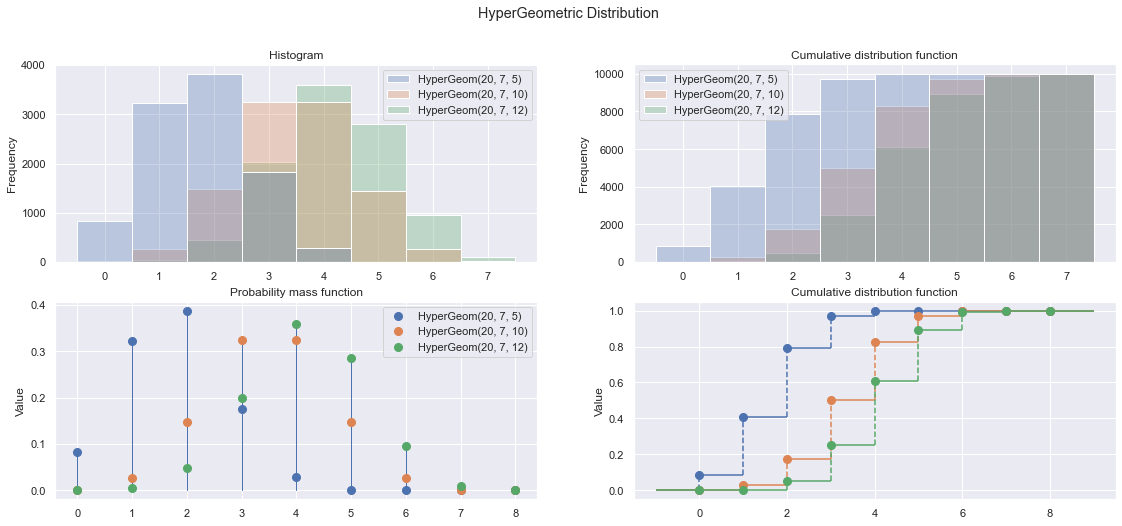

In [294]:
from scipy.stats import hypergeom

Ns = [20, 20, 20]
Ms = [7, 7, 7]
ns = [5, 10, 12]
rvs = [hypergeom(N=i, M = j, n = k) for i, j, k in zip(Ms, Ns, ns)]
labels = ['HyperGeom({1}, {0}, {2})'.format(i, j, k) for i, j, k in zip(Ms, Ns, ns)]
plot_d_rv(rvs, labels, 0, 8, 'HyperGeometric Distribution')
df = d_rv_stat(rvs, labels)
df

### Multinomial Distribution
- Consider a sequence of $n$ independent trials in which each individual trial can have $k$ outcomes occurring with a constant probability value $p_1, p_2, \cdots , p_k$ with $p_1 + p_2 + \cdots + p_k = 1$
- The random variables $X_1, X_2, \cdots , X_k$ with $\sum_{i=1}^k X_i = n$ that count the number of occurrences of the $k$ respective outcomes are said to have a multinomial distribution
- Joint probability mass function of $X_1, X_2, \cdots , X_k$ :
\begin{equation}
    f(x_1, x_2, \cdots, x_k; p_1, \cdots , p_k , n) = \binom{n}{x_1,x_2,\cdots, x_k} p_1^{x_1} p_2^{x_2} \cdots p_k^{x_k}
\end{equation}
with $\sum_{i=1} ^ k x_i = n$ and $\sum_{i=1}^k p_i = 1$
- Also written as:
\begin{equation}
    (X_1, \cdots , X_k) \sim M_k(p_1, \cdots, p_k, n)
\end{equation}
- $E(X_i) = np_i$
- $Var(X_i) = np_i(1-p_i)$

# Problems

## Cumulative distribution function
\begin{equation}
    P(a\leq X \leq b) = F(b) - F(a)
\end{equation}


In [42]:
def plot_probability_rv(rv, a, b, a1, b1, x_text, y_text, discrete = False): # a, b for plot, a1, b1 for probability
    fig, ax = plt.subplots()
    # for distribution curve
    ax.set_title("Cumulative distribution function")
    ax.set_xlabel('x')
    ax.set_ylabel('Value')
    # for fill_between
    a0, b0 = a1, b1
    if(a1 == -np.inf):
        a0 = a
    if(b1 == np.inf):
        b0 = b
    if discrete == True:
        x = np.arange(a, b + 1, 1)
        y = rv.pmf(x)
        print(y)
        ax.plot(x, y, 'o', ms=8)
        ax.vlines(x, 0, y, linestyles='-', lw=1)
        px = np.arange(a0, b0+1 , 1)
        ax.fill_between(px,rv.pmf(px),alpha=0.5)
    else:
        x= np.linspace(a, b, 100)
        px=np.linspace(a0, b0, 100)
        ax.plot(x, rv.pdf(x))
        ax.fill_between(px,rv.pdf(px),alpha=0.5)
    # for text
    val = rv.cdf(b1) - rv.cdf(a1)
    ax.text(x_text, y_text,"{0}".format(round(val,2)), fontsize=20)
    print(val)

In [202]:
def plot_probability_rv(rv, a, b, a1, b1, x_text, y_text, discrete = False): # a, b for plot, a1, b1 for probability
    # for fill_between
    a0, b0 = a1, b1
    if(a1 == -np.inf):
        a0 = a
    if(b1 == np.inf):
        b0 = b
    fig = go.Figure()
    
    if discrete == True:
        x = np.arange(a, b + 1, 1)
        y = rv.pmf(x)
        print(y)
        
        for x0, y0 in zip(x, y):
            fig.add_trace(go.Scatter(x = [x0, x0], y = [0, y0],
                             line_shape='spline', marker_color = colors[idx],
                             legendgroup=labels[idx],
                             name = labels[idx],
                             marker_color = 'purple',
                             showlegend=False
                              ))
        px = np.arange(a0, b0+1 , 1)
        fig.add_trace(go.Scatter(x=px, y=rv.pmf(px), fill='tozeroy', marker_color = 'purple')) # fill down to xaxis
    else:
        x= np.linspace(a, b, 100)
        px=np.linspace(a0, b0, 100)
        fig.add_trace(go.Scatter(x=x, y=rv.pdf(x), marker_color = 'purple')) # fill down to xaxis
        fig.add_trace(go.Scatter(x=px, y=rv.pdf(px), fill='tozeroy', marker_color = 'purple')) # fill down to xaxis
    # for text
    val = rv.cdf(b1) - rv.cdf(a1)
    fig.add_annotation(x=x_text, y=y_text,
            text="{0}".format(round(val,2)),
            showarrow=False,
            font=dict(
                size=18,
                color="#ffffff"
            ),
            yshift=10)
    print(val)


    fig.update_layout(title="Cumulative distribution function", width=1000, height=500, showlegend=False)
    fig.update_traces(opacity=0.3)
    fig.show()

SyntaxError: keyword argument repeated: marker_color (<ipython-input-202-e0f35efdc572>, line 16)

In [203]:
rv = norm()
a, b = -4, 4
a1, b1 = -np.inf, 1.644853
plot_probability_rv(rv, a, b, a1, b1, 0, 0.1)
#print(rv.ppf(0.95))

0.949999935338925


In [204]:
rv = binom(n=20, p = 0.7)
a, b = 0, 20
a1, b1 = -np.inf, 13
plot_probability_rv(rv, a, b, a1, b1, 12, 0.07, discrete = True)

[3.48678440e-11 1.62716605e-09 3.60688475e-08 5.04963865e-07
 5.00755833e-06 3.73897689e-05 2.18106985e-04 1.01783260e-03
 3.85928193e-03 1.20066549e-02 3.08170809e-02 6.53695655e-02
 1.14396740e-01 1.64261985e-01 1.91638983e-01 1.78863051e-01
 1.30420974e-01 7.16036722e-02 2.78458725e-02 6.83933711e-03
 7.97922663e-04]
0.39199018779907624


## Sum of random variable

In [33]:
def plot_sum_rvs(rvs, rv0, a, b, discrete = False, tabulate = False):
    SIZE = 1000
    data = np.zeros(SIZE)
    for i, rv in enumerate(rvs):
        data += rv.rvs(size=SIZE)
    sns.histplot(data,
                 kde=True,
                 alpha = 0.3,
                 discrete=discrete)
    target = rv0.rvs(size=SIZE)
    sns.histplot(target,
                 color = 'red',
                 kde=True,
                 alpha = 0.3,
                 discrete=discrete)
    error = target - data
    if tabulate:
        print(error)
    e = (error ** 2).sum()
    print(math.sqrt(e) / SIZE)


0.06295212416081943


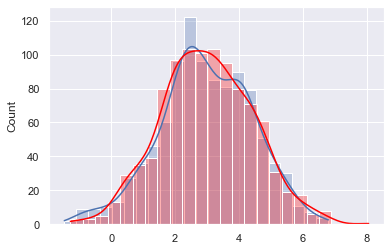

In [34]:
rv1 = norm(loc = 2, scale = 1)
rv2 = norm(loc = 1, scale = 1)
rv3 = norm(loc = 3, scale = math.sqrt(2))
plot_sum_rvs([rv1, rv2], rv3, -4, 4)

## Book problems
Probability and Statistics The Science of Uncertainty, Michael J. Evans and Je§rey S. Rosenthal

2	3	4	5	6	7	
3	4	5	6	7	8	
4	5	6	7	8	9	
5	6	7	8	9	10	
6	7	8	9	10	11	
7	8	9	10	11	12	


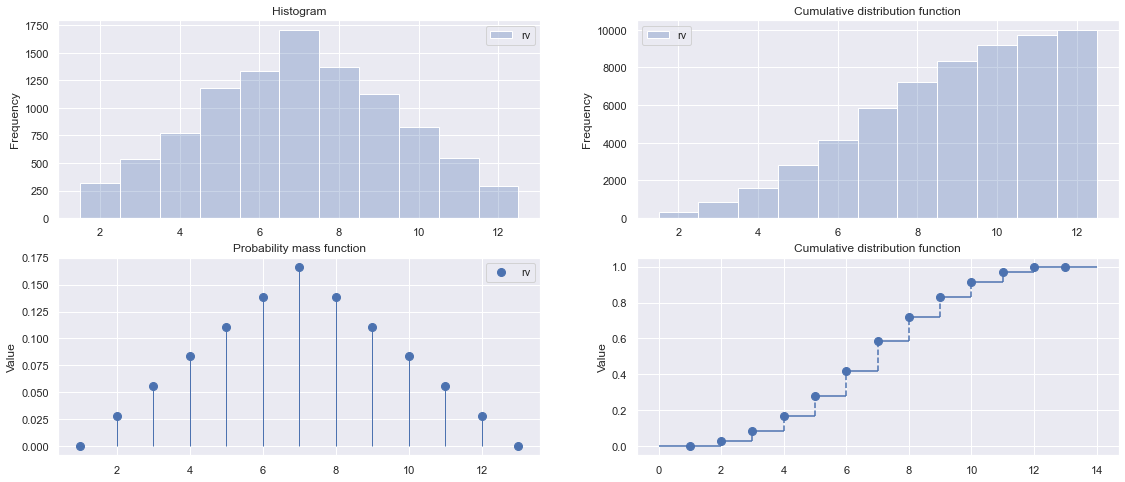

In [13]:
# 2.3.1
# Consider rolling two fair six-sided dice. Let Y be the sum of the numbers showing. What is the probability function of Y?
for i in np.arange(6):
    for j in np.arange(6):
        print(str(i + j + 2) + "\t", end = '')
    print("")
xk = np.arange(2, 13)
pk = np.array([1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1])
pk = pk / 36
rv = stats.rv_discrete(name='custm', values=(xk, pk))

plot_d_rv([rv], ["rv"], 1, 13)

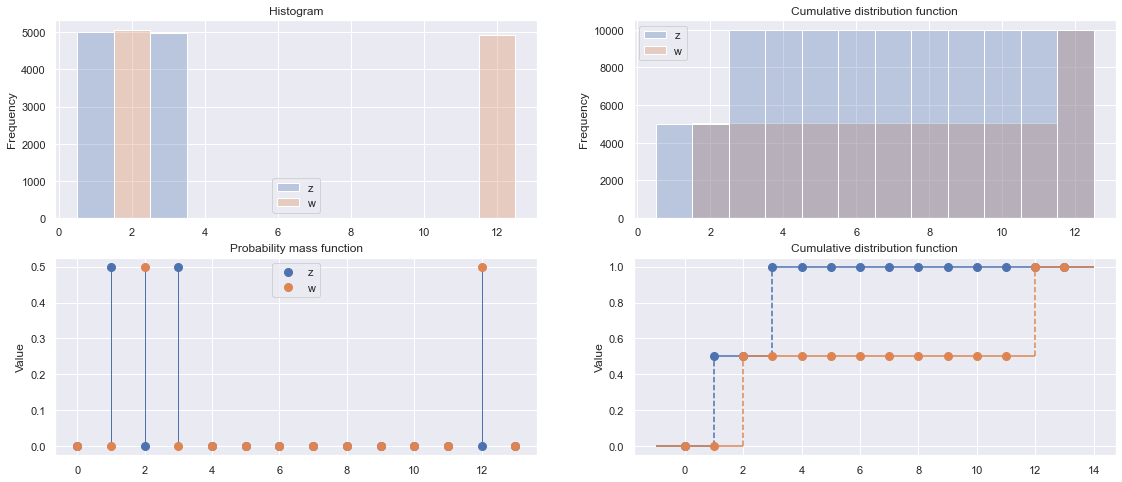

In [75]:
# 2.3.2
# Consider flipping a fair coin. Let Z = 1 if the coin is heads, and Z = 3 if the
# coin is tails. Let W = Z2 + Z.
# (a) What is the probability function of Z?
# (b) What is the probability function of W?
z = stats.rv_discrete(name='custm', values=([1, 3], [0.5, 0.5]))
w = stats.rv_discrete(name='custm', values=([2, 12], [0.5, 0.5]))
plot_d_rv([z, w], ["z", "w"], 0, 13)

1	2	3	4	5	6	
2	4	6	8	10	12	
3	6	9	12	15	18	
4	8	12	16	20	24	
5	10	15	20	25	30	
6	12	18	24	30	36	


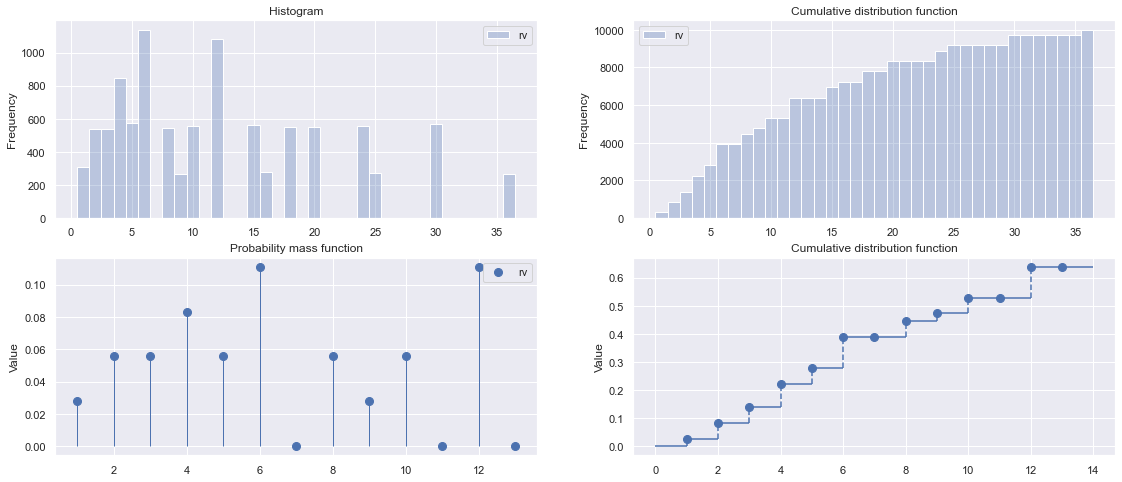

In [84]:
# 2.3.5
# Consider rolling two fair six-sided dice. Let W be the product of the numbers showing. What is the probability function of W?
for i in np.arange(6):
    for j in np.arange(6):
        print(str((i + 1)*(j+1)) + "\t", end = '')
    print("")
xk = np.arange(1, 37)
pk = np.array([1, 2, 2, 3, 2, 4, 0, 2, 1, 2, 0, 4, 0, 0, 2, 1, 0, 2, 0, 2, 0,0,0,2,1,0,0,0,0,2,0,0,0,0,0,1])
pk = pk / 36
rv = stats.rv_discrete(name='custm', values=(xk, pk))

plot_d_rv([rv], ["rv"], 1, 13)

[0.         0.2        0.16       0.128      0.1024     0.08192
 0.065536   0.0524288  0.04194304 0.03355443 0.02684355 0.02147484
 0.01717987 0.0137439  0.01099512 0.00879609 0.00703687 0.0056295
 0.0045036  0.00360288 0.0028823 ]
0.193462272


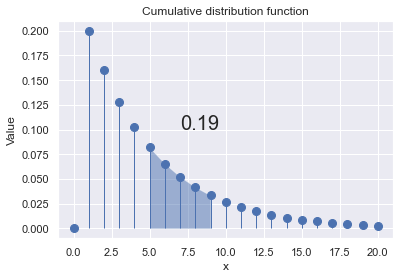

In [101]:
# 2.3.6 Let Z ∼ Geometric(θ). Compute P(5 ≤ Z ≤ 9)
z = geom(p = 0.2)
a, b = 0, 20
a1, b1 = 5, 9
plot_probability_rv(z, a, b, a1, b1, 7, 0.1, discrete = True)

Binomial Distribution
\begin{equation}
    P(X=11) = \binom{12}{11}p^{11}(1-p)^{12-11} = 12p^{11}(1-p) \rightarrow max
\end{equation}
\begin{equation}
    11p^{10}(1-p) - p^{11} = p^{10}(11 - 12p) = 0
\end{equation}
$p = \frac{11}{12}$

0.3839952305608769
0.3012178386413057
0.20615843020800015


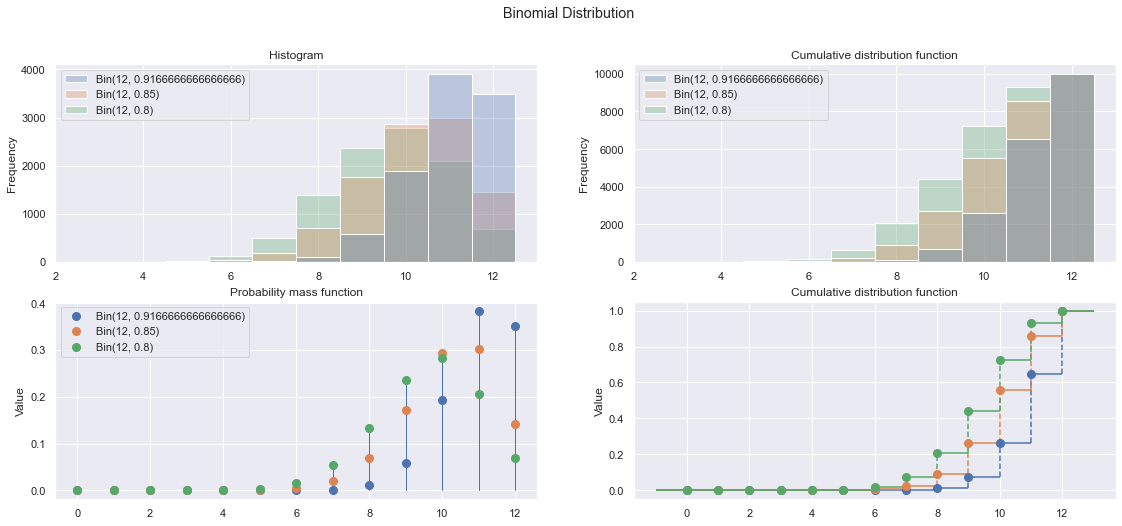

In [111]:
# 2.3.7 Let X ∼ Binomial(12,θ). For what value of θ is P(X = 11) maximized?
ns = [12, 12, 12]
ps = [11/12, 0.85, 0.8]
rvs = [binom(n=i, p=j) for i, j in zip(ns, ps)]
labels = ['Bin({0}, {1})'.format(i, j) for i, j in zip(ns, ps)]
plot_d_rv(rvs, labels, 0, 12, 'Binomial Distribution')
for rv in rvs:
    print(rv.pmf(11))

Poisson Distribution
- Probability mass function:
\begin{equation}
    P(X = x) = \frac{ e^{- \lambda} \lambda ^ {x}} {x!} \text{   } x=0,1,2, \cdots.
\end{equation}
- $P(W = 11) = \frac{ e^{- \lambda} \lambda ^ {11}} {11!}$
- $\frac{1} {11!}(-e^{- \lambda} \lambda ^ {11} + 11e^{- \lambda} \lambda ^ {10}) = \frac{1} {11!}e^{- \lambda} \lambda ^ {10}(-\lambda + 11) = 0$
- $\lambda = 11$

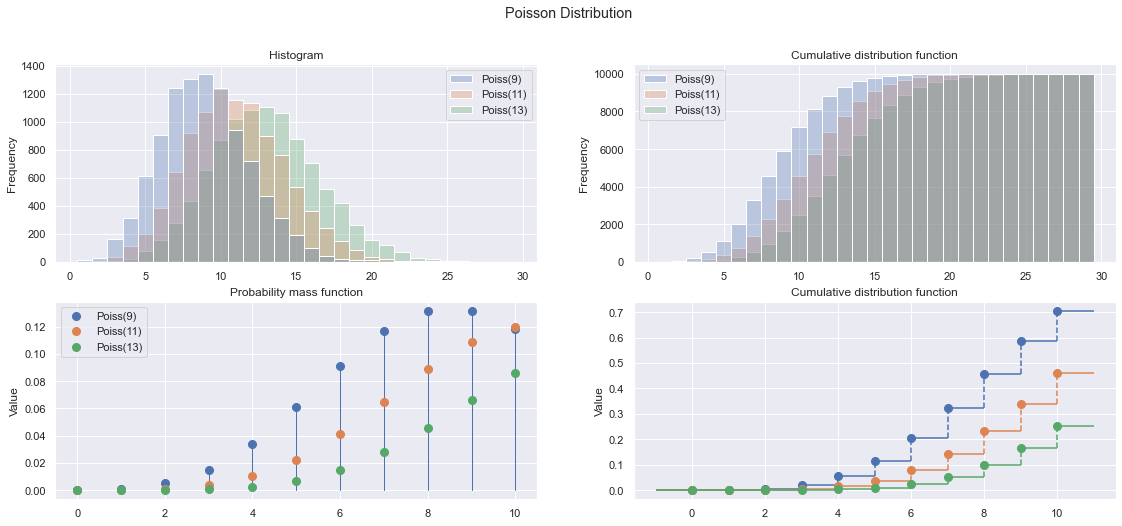

In [10]:
# 2.3.8 Let W ∼ Poisson(λ). For what value of λ is P(W = 11) maximized?
mus = [9, 11, 13]
rvs = [poisson(mu = i) for i in mus]
labels = ['Poiss({0})'.format(i) for i in mus]

plot_d_rv(rvs, labels, 0, 10, 'Poisson Distribution')

[0.015625   0.03515625 0.05273438 0.06591797 0.07415771 0.0778656
 0.0778656  0.07508469 0.07039189 0.0645259  0.05807331 0.05147407
 0.04503981 0.03897676 0.03340865 0.02839735 0.02396027 0.02008434
 0.01673695 0.01387405 0.01144609]
0.103515625


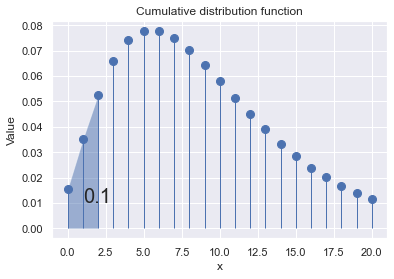

In [13]:
# 2.3.9 Let Z ∼ Negative-Binomial(3, 1/4). Compute P(Z ≤ 2)
rv = nbinom(n=3, p=0.25)
a, b = 0, 20
a1, b1 = -np.inf, 2
plot_probability_rv(rv, a, b, a1, b1, 1, 0.01, discrete = True)

[0.2        0.16       0.128      0.1024     0.08192    0.065536
 0.0524288  0.04194304 0.03355443 0.02684355 0.02147484 0.01717987
 0.0137439  0.01099512 0.00879609 0.00703687 0.0056295  0.0045036
 0.00360288 0.0028823 ]
0.488


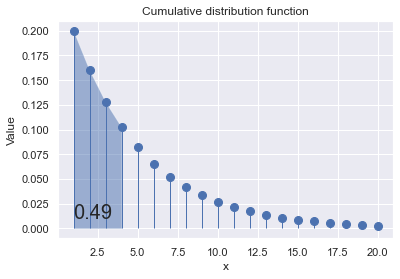

In [14]:
# 2.3.10 Let X ∼ Geometric(1/5). Compute P(X2 ≤ 15)
import math
rv = geom(p=0.2)
a, b = 1, 20
a1, b1 = -np.inf, math.sqrt(15)
plot_probability_rv(rv, a, b, a1, b1, 1, 0.01, discrete = True)

Bin(10, 0.7): 0.02824752489999998
Bin(10, 0.5): 0.0009765625
Bin(10, 0.2): 1.0240000000000006e-07


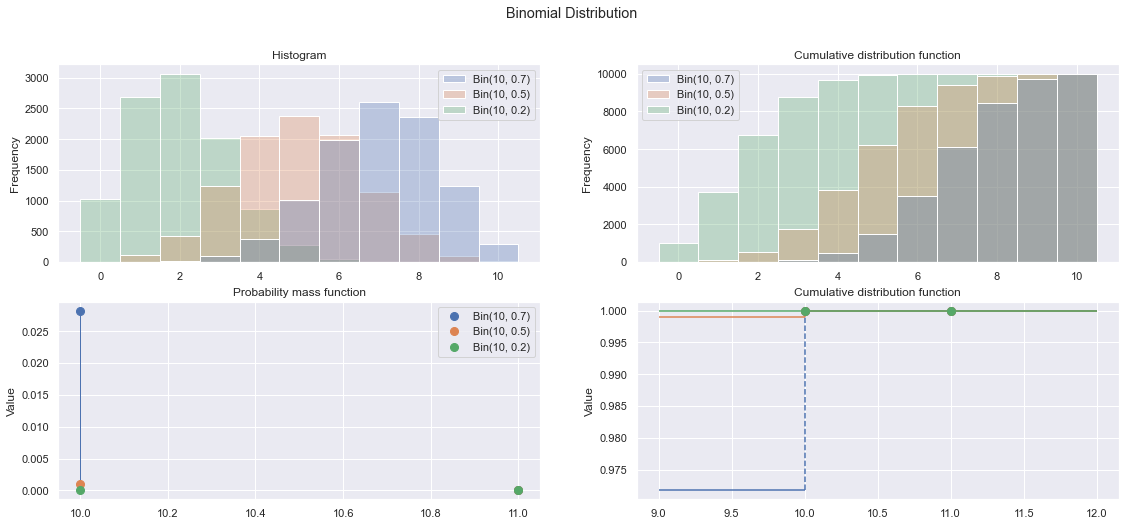

In [19]:
# 2.3.11 Let Y ∼ Binomial(10,θ). Compute P(Y = 10)
ns = [10, 10, 10]
ps = [0.7, 0.5, 0.2]
rvs = [binom(n=i, p=j) for i, j in zip(ns, ps)]
labels = ['Bin({0}, {1})'.format(i, j) for i, j in zip(ns, ps)]
plot_d_rv(rvs, labels, 10, 11, 'Binomial Distribution')
for i, rv in enumerate(rvs):
    print(labels[i] + ": " + str(rv.pmf(10)))

0.3575851393188852
0.0001031991744066048
0.0


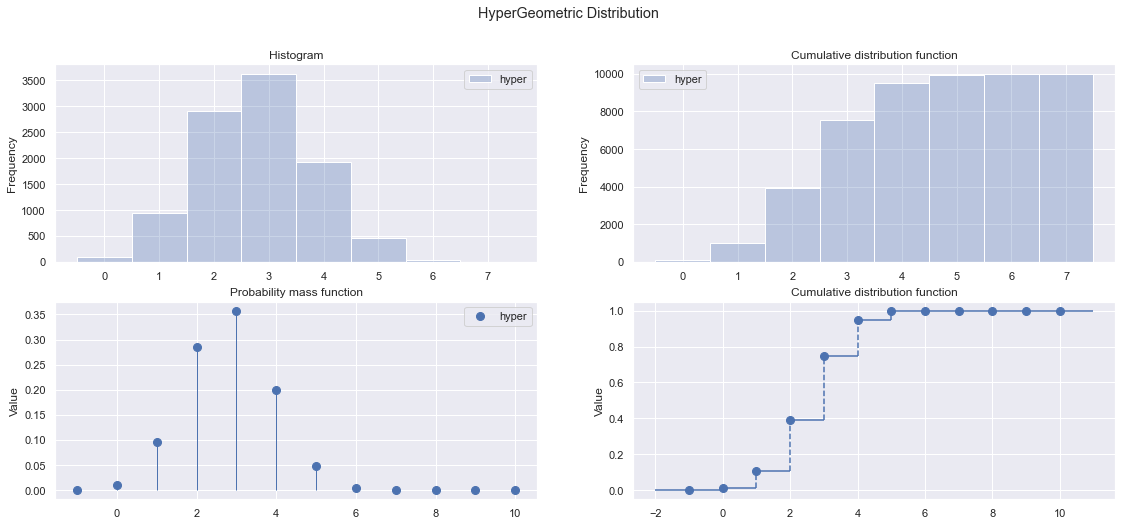

In [25]:
# 2.3.13 Let X ∼ Hypergeometric(20, 7, 8). What is the probability that X = 3? What is the probability that X = 8?
rv = hypergeom(N=7, M=20, n=8)
print(rv.pmf(3))
print(rv.pmf(7))
print(rv.pmf(8))
plot_d_rv([rv], ["hyper"], -1, 10, 'HyperGeometric Distribution')

PMF HyperGeom(20, 8, 10): [0.00035723 0.00952608 0.07501786 0.24005716 0.35008335 0.24005716
 0.07501786 0.00952608 0.00035723]
CDF HyperGeom(20, 8, 10): [0.00000000e+00 3.57227911e-04 9.88330555e-03 8.49011669e-02
 3.24958323e-01 6.75041677e-01 9.15098833e-01 9.90116694e-01
 9.99642772e-01 1.00000000e+00 1.00000000e+00]


Mean  Variance
HyperGeom(20, 8, 10)   4.0  1.263158

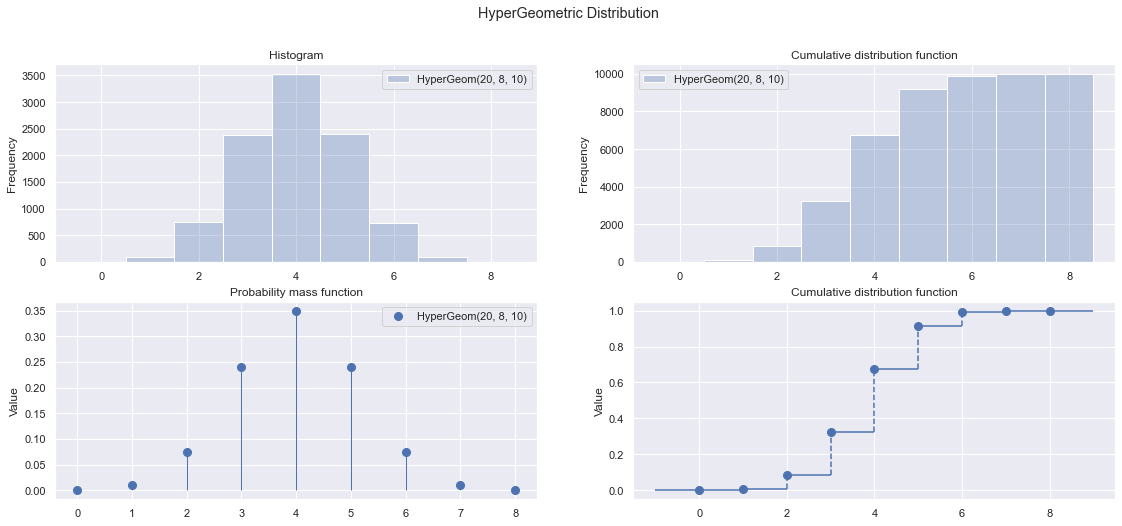

In [56]:
# 2.3.21 Tabulate and plot the Hypergeometric(20, 8, 10) probability function
Ns = [20]
Ms = [8]
ns = [10]
rvs = [hypergeom(N=i, M = j, n = k) for i, j, k in zip(Ms, Ns, ns)]
labels = ['HyperGeom({1}, {0}, {2})'.format(i, j, k) for i, j, k in zip(Ms, Ns, ns)]
plot_d_rv(rvs, labels, 0, 8, 'HyperGeometric Distribution', True)
df = d_rv_stat(rvs, labels)
df

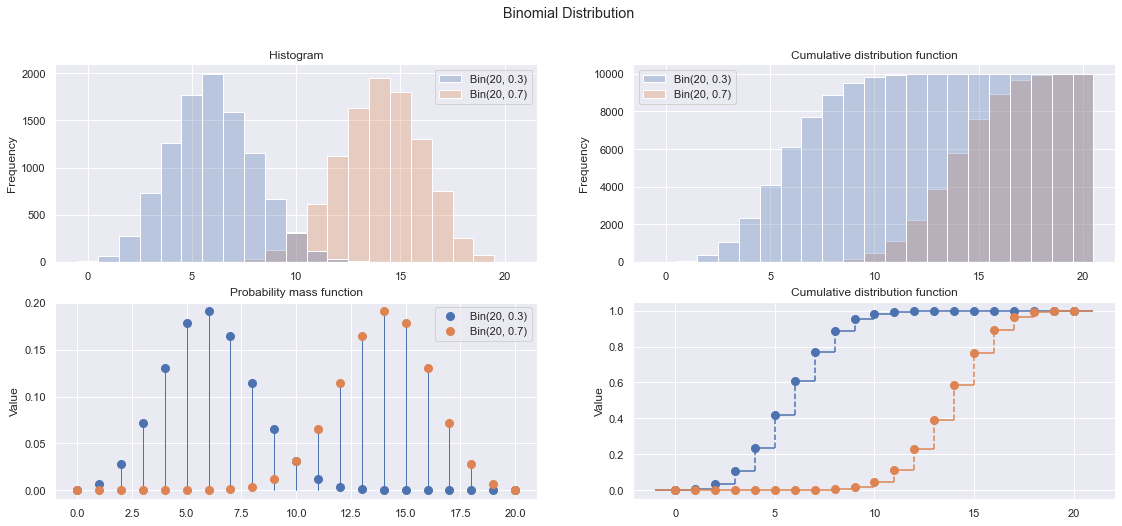

In [60]:
# 2.3.22 Tabulate and plot the Binomial(30, 0.3) probability function. Tabulate and plot
# the Binomial(30, 0.7) probability function. Explain why the Binomial(30, 0.3) probability function at x agrees with the Binomial(30, 0.7) probability function at n − x.
ns = [20, 20]
ps = [0.3, 0.7]
rvs = [binom(n=i, p=j) for i, j in zip(ns, ps)]
labels = ['Bin({0}, {1})'.format(i, j) for i, j in zip(ns, ps)]
plot_d_rv(rvs, labels, 0, 20, 'Binomial Distribution')

0.11663618649458667


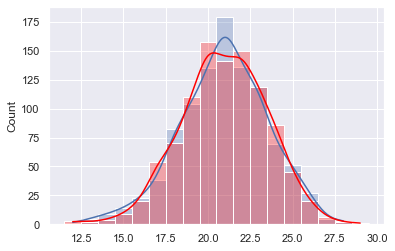

In [21]:
rv1 = binom(n = 10, p=0.7)
rv2 = binom(n = 20, p=0.7)
rv3 = binom(n = 30, p=0.7)
plot_sum_rvs([rv1, rv2], rv3, -4, 4, discrete = True)

0.05577633906953736


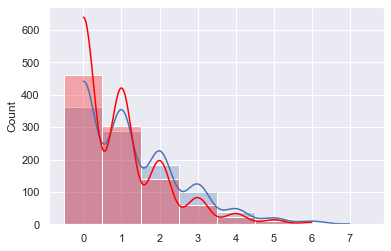

In [31]:
rv1 = geom(loc=-1, p=0.7)
rv3 = nbinom(n = 2, p=0.7)
plot_sum_rvs([rv1, rv1, rv1], rv3, -4, 4, discrete = True)

0.1947126087340006


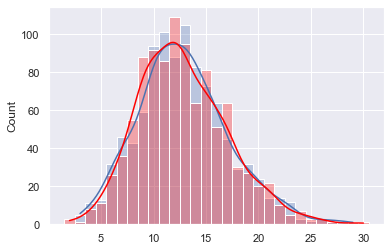

In [32]:
rv1 = nbinom(n = 10, p=0.7)
rv2 = nbinom(n = 20, p=0.7)
rv3 = nbinom(n = 30, p=0.7)
plot_sum_rvs([rv1, rv2], rv3, -4, 4, discrete = True)

2.866515718791933e-07
0.9772498680505409
0.0013498980316301035


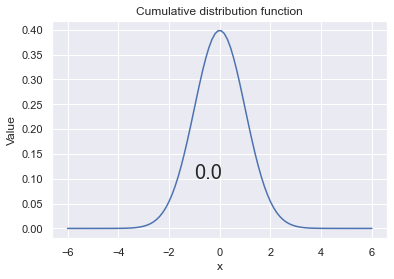

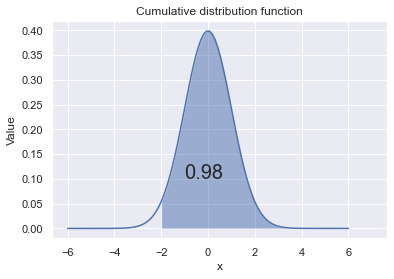

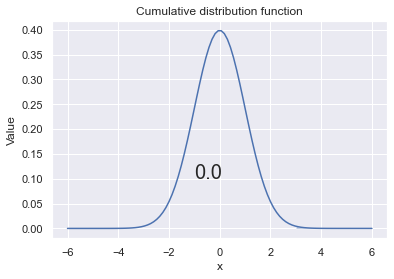

In [22]:
# 2.5.4 Let X ∼ N(0, 1). Compute each of the following in terms of the function  of
# Definition 2.5.2 and use Table D.2 (or software) to evaluate these probabilities numerically.
# (a) P(X ≤ −5)
# (b) P(−2 ≤ X ≤ 7)
# (c) P(X ≥ 3)
rv = norm()
a, b = -6, 6
plot_probability_rv(rv, a, b, -np.inf, -5, -1, 0.1)
plot_probability_rv(rv, a, b, -2, 7, -1, 0.1)
plot_probability_rv(rv, a, b, 3, np.inf, -1, 0.1)

0.15865525393145707
0.15865525393145707


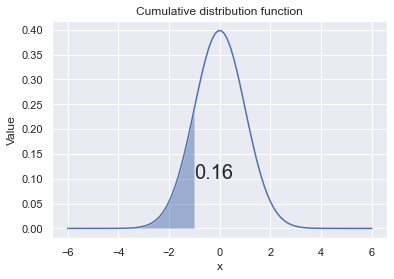

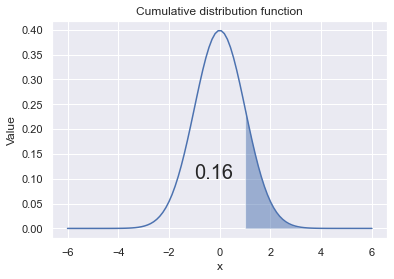

In [24]:
rv = norm()
a, b = -6, 6
plot_probability_rv(rv, a, b, -np.inf, -1, -1, 0.1)
plot_probability_rv(rv, a, b, 1, np.inf, -1, 0.1)

# Bivariate distributions

In [253]:
# https://peterroelants.github.io/posts/multivariate-normal-primer/
from matplotlib import cm
def plot_bivariate_rv(rvs, labels, sub_titles, x1, x2, y1, y2, title = ''):
    plot_rows=3
    plot_cols=len(rvs)
    fig, axs = plt.subplots(plot_rows, plot_cols, figsize=(19, 4*plot_rows))
    fig.suptitle(title)
    
    SIZE = 1000
    for idx, rv in enumerate(rvs):
        data = rv.rvs(size=SIZE)
        x = data[:,0]
        y = data[:,1]
        ax = axs[0, idx]
        plot_distribution_headers(ax, sub_titles[idx], '')
        ax.plot(x, y, 'o', alpha=0.3,
             markeredgewidth = 0.5,
             markeredgecolor = 'black')
        ax = axs[1, idx]
        #ax.hist2d(x, y, bins=(300, 30), cmap=plt.cm.jet)
        ax.hexbin(x, y, bins = 20, cmap=cm.viridis)
        
        ax = axs[2, idx]
        size = 100
        x = np.linspace(x1, x2, num=size)
        y = np.linspace(y1, y2, num=size)
        X, Y = np.meshgrid(x,y)

        # Generating the density function
        # for each point in the meshgrid
        pdf = np.zeros(X.shape)
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                pdf[i,j] = rv.pdf([X[i,j], Y[i,j]])
        
        ax.contourf(X, Y, pdf, cmap=cm.viridis)
        
        
        
    plt.show()
    
    plt.rcParams['figure.figsize']=19,6
    fig = plt.figure()
    for idx, rv in enumerate(rvs):
        
        size = 100
        x = np.linspace(x1, x2, num=size)
        y = np.linspace(y1, y2, num=size)
        X, Y = np.meshgrid(x,y)

        # Generating the density function
        # for each point in the meshgrid
        pdf = np.zeros(X.shape)
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                pdf[i,j] = rv.pdf([X[i,j], Y[i,j]])
        
        ax = fig.add_subplot(1, plot_cols, idx + 1, projection = '3d')
        ax.plot_surface(X, Y, pdf, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

        cset = ax.contourf(X, Y, pdf, zdir='z', offset=-0.15, cmap=cm.viridis)
        ax.set_zlim(-0.15,0.2)
              
        
        

In [196]:
def plot_bivariate_rv(rvs, labels, sub_titles, x1, x2, y1, y2, title = ''):
    plot_rows=4
    plot_cols=len(rvs)
    fig = make_subplots(rows=plot_rows, cols=plot_cols, 
                        subplot_titles=sub_titles,
                        row_heights=[0.2, 0.2, 0.2, 0.4],
                       specs=[[{'type': 'xy'}] * plot_cols,
                              [{'type': 'xy'}] * plot_cols,
                              [{'type': 'xy'}] * plot_cols,
                              [{'type': 'surface'}] * plot_cols])
    SIZE = 1000
    for idx, rv in enumerate(rvs):
        data = rv.rvs(size=SIZE)
        x = data[:,0]
        y = data[:,1]
        fig.add_trace(go.Scatter(x = x, y = y,
                                 mode='markers',
                                 legendgroup=labels[idx],
                                 name = labels[idx]
                                  ), row=1, col=idx+1)
        fig.add_trace(go.Histogram2dContour(x = x, y = y, showscale=False,
                                            legendgroup=labels[idx],
                                             name = labels[idx]
                                  ), row=2, col=idx+1)
        
        
        size = 100
        x = np.linspace(x1, x2, num=size)
        y = np.linspace(y1, y2, num=size)
        X, Y = np.meshgrid(x,y)

        # Generating the density function
        # for each point in the meshgrid
        pdf = np.zeros(X.shape)
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                pdf[i,j] = rv.pdf([X[i,j], Y[i,j]])
                
        fig.add_trace(go.Contour(z=pdf, contours_coloring='heatmap', showscale=False,
                                legendgroup=labels[idx],
                                 name = labels[idx]), row=3, col=idx+1)

        fig.add_trace(go.Surface(z=pdf, x=x, y=y, showscale=False,
                                legendgroup=labels[idx],
                                 name = labels[idx]), row=4, col=idx+1)

    fig.update_layout(title=title, width=1000, height=1500)
    fig.update_traces(opacity=0.8)
    fig.update_annotations(font_size=12)
    fig.update_traces(showlegend=False)
    fig.show()

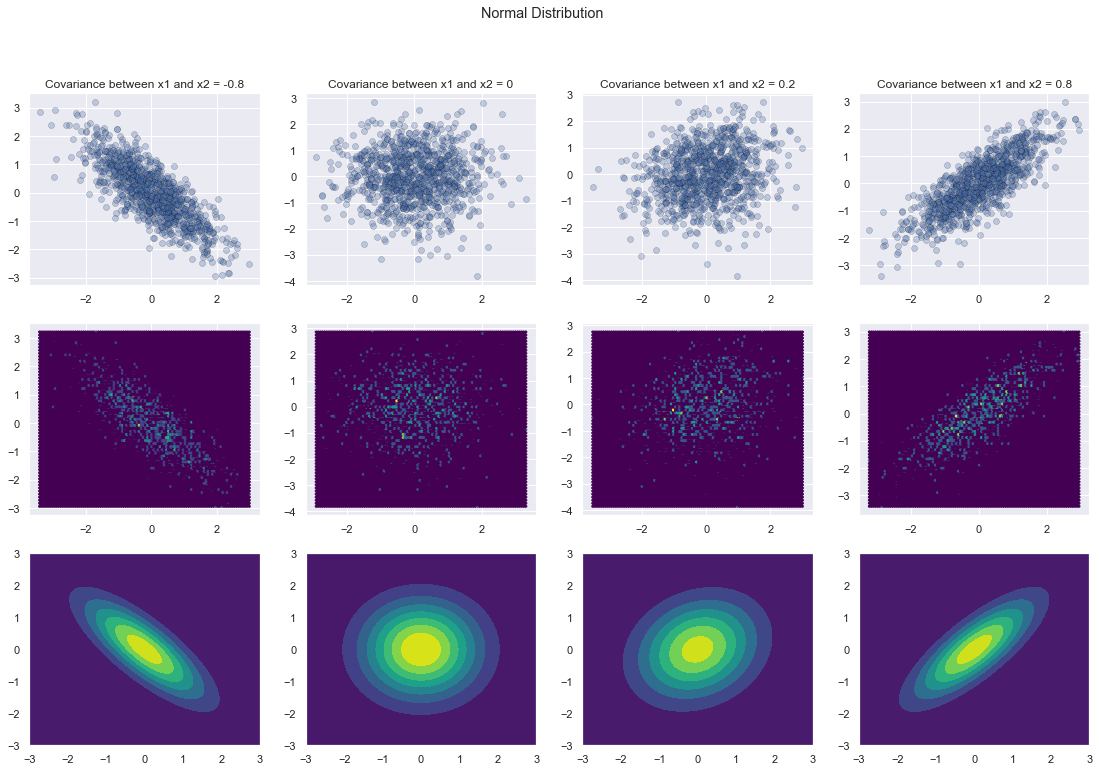

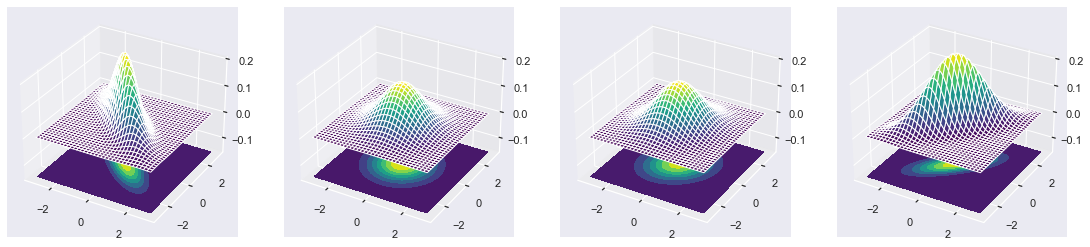

In [254]:
random_seed=1000
# List containing the variance
# covariance values
cov_val = [-0.8, 0, 0.2,  0.8]
  
# Setting mean of the distributino 
# to be at (0,0)
mean = np.array([0,0])
  
# Storing density function values for 
# further analysis
rvs = []
labels = []
sub_titles = []
  
# Iterating over different covariance values
for idx, val in enumerate(cov_val):
      
    # Initializing the covariance matrix
    cov = np.array([[1, val], [val, 1]])
      
    # Generating a Gaussian bivariate distribution
    # with given mean and covariance matrix
    rv = multivariate_normal(cov = cov, mean = mean,
                                seed = random_seed)
    rvs.append(rv)
    labels.append(f'Cov = {val}')
    sub_titles.append(f'Covariance between x1 and x2 = {val}')
      
plot_bivariate_rv(rvs, labels, sub_titles, -3, 3, -3, 3, "Normal Distribution")

In [130]:
def plot_3d_rv(rv, x1, x2, y1, y2, title):
    size = 100
    x = np.linspace(x1, x2, num=size)
    y = np.linspace(y1, y2, num=size)
    X, Y = np.meshgrid(x,y)

    # Generating the density function
    # for each point in the meshgrid
    pdf = np.zeros(X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            pdf[i,j] = rv.pdf([X[i,j], Y[i,j]])

    fig = go.Figure(data=[go.Surface(z=pdf, x=x, y=y)])
    fig.update_traces(contours_x=dict(show=True, usecolormap=True,
                                      highlightcolor="limegreen", project_x=True))
    fig.update_traces(contours_y=dict(show=True, usecolormap=True,
                                      highlightcolor="limegreen", project_y=True))
    fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                      highlightcolor="limegreen", project_z=True))
    fig.update_layout(title=title, width=1000, height=1000)
    fig.show()

In [131]:
# Initializing the covariance matrix
val = 0
mean = [0, 0]
# Initializing the random seed
random_seed=1000

cov = np.array([[1, val], [val, 1]])
# Generating a meshgrid complacent with
# the 3-sigma boundary
mean_1, mean_2 = mean[0], mean[1]
sigma_1, sigma_2 = cov[0,0], cov[1,1]
x1, x2 = -3*sigma_1, 3*sigma_1
y1, y2 = -3*sigma_2, 3*sigma_2


# Generating a Gaussian bivariate distribution
# with given mean and covariance matrix
rv = multivariate_normal(cov = cov, mean = mean,
                            seed = random_seed)

plot_3d_rv(rv, x1, x2, y1, y2, f'Normal Distribution Cov={val}')

# Snippets

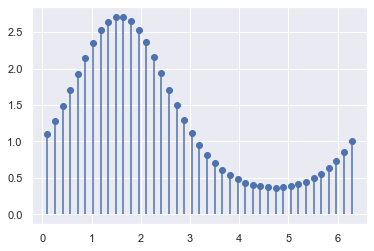

In [39]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.1, 2 * np.pi, 41)
y = np.exp(np.sin(x))

markerline, stemlines, baseline = plt.stem(x, y)
plt.setp(baseline, visible=False)
plt.show()

# Order Statistics

In [250]:
def plot_min_rvs(rvs, rv0, a, b, discrete = False, tabulate = False):
    SIZE = 1000
    data = [100] * SIZE
    for i, rv in enumerate(rvs):
        d = rv.rvs(size=SIZE)
        for idx in range(len(data)): # min
            if(data[idx] > d[idx]):
                data[idx] = d[idx]
        #data = np.where(data < d, d, data) # max
    sns.histplot(data,
                 kde=True,
                 alpha = 0.3,
                 discrete=discrete)
    if rv0 != None:
        target = rv0.rvs(size=SIZE)
        sns.histplot(target,
                     color = 'red',
                     kde=True,
                     alpha = 0.3,
                     discrete=discrete)
        error = target - data
        if tabulate:
            print(error)
        e = (error ** 2).sum()
        print(math.sqrt(e) / SIZE)


0.03629914015822721


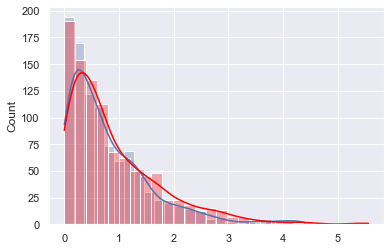

In [252]:
from scipy.stats import expon
n = 3
locs = [0] * n
scales = [2.5] * n
rvs = [expon(loc=i, scale=j) for i, j in zip(locs, scales)]
rv0 = expon(loc=0, scale=2.5/n)
plot_min_rvs(rvs, rv0, 0, 10)

# Sampling distributions

In [35]:
# setup
data = pd.DataFrame()
SIZE = 10000
rv = uniform(loc=0, scale=1)
data["U1"] = rv.rvs(size = SIZE)
data["U2"] = rv.rvs(size = SIZE)

<AxesSubplot:ylabel='Count'>

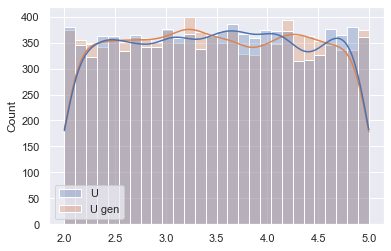

In [38]:
L, R = 2, 5
rv = uniform(loc=L, scale=R-L)
data["U"] = rv.rvs(size = SIZE)
data["Generated"] = data["U1"]*(R - L) + L
sns.histplot(data[["U", "Generated"]], kde=True, alpha = 0.3)

<AxesSubplot:ylabel='Count'>

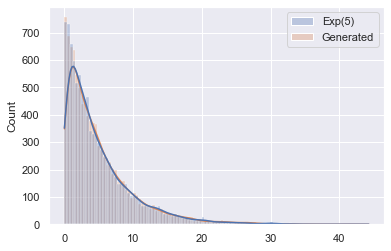

In [49]:
lam = 5
rv = expon(loc=0, scale=lam)
data["Exp(5)"] = rv.rvs(size = SIZE)
data["Generated"] = np.log(data["U1"]) * (-lam)
sns.histplot(data[["Exp(5)", "Generated"]], kde=True, alpha = 0.3)

<AxesSubplot:ylabel='Count'>

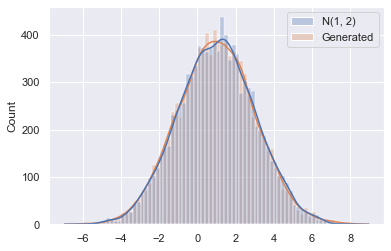

In [52]:
a, sigma = 1, 2
rv = norm(loc=a, scale=sigma)
data["N(1, 2)"] = rv.rvs(size = SIZE)
data["Generated"] = np.sqrt(np.log(data["U1"]) * (-2)) * np.cos(2*np.pi*data["U2"])
data["Generated"] = sigma * data["Generated"] + a
sns.histplot(data[["N(1, 2)", "Generated"]], kde=True, alpha = 0.3)

<AxesSubplot:ylabel='Count'>

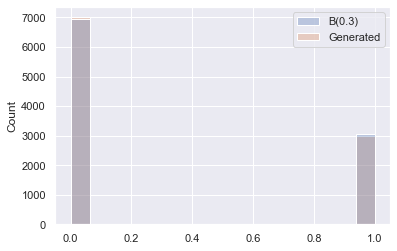

In [58]:
p = 0.3
rv = bernoulli(p = p)
data["B(0.3)"] = rv.rvs(size = SIZE)
data["Generated"] = [1 if i < p else 0 for i in data["U1"]] 
sns.histplot(data[["B(0.3)", "Generated"]], kde=False, alpha = 0.3)

<AxesSubplot:ylabel='Count'>

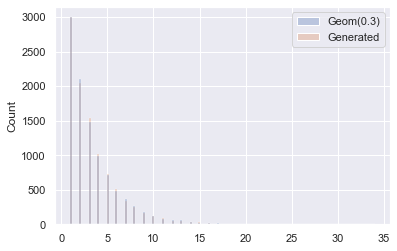

In [61]:
p = 0.3
rv = geom(p = p)
data["Geom(0.3)"] = rv.rvs(size = SIZE)
data["Generated"] = np.floor(np.log(data["U1"]) / np.log(1-p)) + 1
sns.histplot(data[["Geom(0.3)", "Generated"]], kde=False, alpha = 0.3)